# Find the best markets to advertise in for a E-learning company project

We're working for an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but we also cover other domains, like datqa science, game development etc. We want to promote our product and to invest some money in advertisement. 

# Our goal:
Find out the two best markets to advertise our product in.

We can try searching existing data thart might be available for our purpose. 
We can start by exploring the data from [freeCodeCamp.](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/)
[FreeCodeCamp](https://www.freecodecamp.org/news/) is a free e-learning platform that offers courses on web development. They run a populat Medium publication and their survey attracts new coders with varying interests. The 2017 survey data is publicly available [here.](https://github.com/freeCodeCamp/2017-new-coder-survey)

# Read the dataset

In [46]:
import pandas as pd
import numpy as np
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [49]:
survey.shape

(18175, 136)

You can learn more about the survey, [here.](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/)

# Checking for sample representativity

We need to clarify first if we have the right group of people for our analysis.
The JobRoleInterest column describes the role they'd be interested in working for each participant. That should mean that they would also like to learn more about that domain.
Let's generate a frequency distribution table for that column and analyze it.

In [50]:
survey['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

At a first glance, we can notice that:
 - many people are interested in web development
 - many people have more than one interest
 - a few are interested in mobile development
 
Let's drop the null values and split the column into options to find the number of options for each participant.

In [51]:
interest_no_nulls = survey['JobRoleInterest'].dropna()
split_interest = interest_no_nulls.str.split(',')

In [52]:
n_options = split_interest.apply(lambda x: len(x))
n_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

31% of the participants are focused on one domain, but the rest are looking at more options. This might be a good thing for us, because we offer various courses. Our main interest is in web development and mobile development, so let's see how many are interested in these domains.

In [53]:
web_mobile = interest_no_nulls.str.contains('Web Developer|Mobile Developer')
freq = web_mobile.value_counts(normalize=True)*100

86% are interested in Web Developer or Mobile Developer roles.
Let's make our analysis more visual.

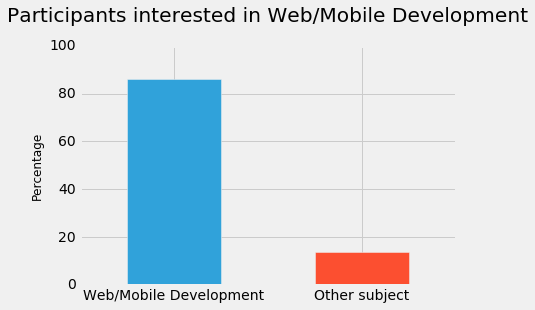

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq.plot.bar()
plt.title('Participants interested in Web/Mobile Development', y=1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1], ['Web/Mobile Development', 'Other subject'], rotation = 0)
plt.ylim([0,100])
plt.show()




This sample is definitely representative to our target population.

We should start learning more about them:
 - where are they located
 - what are the locations with the greatest number of new coders
 - how much money new coders are willing to spend on learning

# Location
We have 2 columns that offer information about location, one is CountryCitizen and the other is CountryLive. We're more interested about where they live, wo we are going to use CountryLive column for our analysis.

We can try and find the two best countries to advertise in.
To make sure we're working with a repressentative sample, let's drop all the rows where the participants didn't answer what role they are interested in.

In [55]:
survey_updated = survey[survey['JobRoleInterest'].notnull()].copy()
absolute_freq = survey_updated['CountryLive'].value_counts()
relative_freq = survey_updated['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame(data = {'Absolute frequency':absolute_freq, 'Percentage':relative_freq})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


# Spending Money

The top markets are USA, India, UK and Canda. We still need to take a closer look to understand how much money are people willing to spend on learning. High density might mean also people interested in free options.

The MoneyForLearning column, describes in US Dollars the amoount of money spent by participants from the moment they started coding until the moment they completed the survey. Our monthly subscription is $59, so we need to know how much money they are spenging on a monthly basis.

Considering that we already found the countries with the highest frequency, that are also English speaking countries (our courses are written in English), we are going to limit our analysis to those locations.

We will create a new column -MoneyPerMonth- that contains the amount of money a stundet has spent per month, using MoneyForLearning and MonthsProgramming columns. 
To avoid divizion by 0, we will replace all values of 0 with 1 in our MonthsProgramming column.
We'll also get rid of the rows that contain null values in our new column.

In [56]:
survey_updated['MonthsProgramming'].replace(0,1, inplace=True) 
survey_updated['MoneyPerMonth'] = survey_updated['MoneyForLearning'] / survey_updated['MonthsProgramming']
survey_updated['MoneyPerMonth'].isnull().sum()

675

In [57]:
survey_updated = survey_updated[survey_updated['MoneyPerMonth'].notnull()]

We need to remove also the rows that have null values in the ContryLive column.
Finally, we are going to group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the UK and Canada.

In [59]:
survey_updated = survey_updated[survey_updated['CountryLive'].notnull()]

In [68]:
countries_mean = survey_updated.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

# Looking for extreme Ouliers

It is surprising to see that people in UK and Canada are spending less on learning than people in India, considering the GDP. It might be that we have some outliers that make the mean to big for India, or too low for Canada/UK. Or the result might be correct.

We need to check and see.

In [72]:
usincauk = survey_updated[survey_updated['CountryLive'].str.contains('United States of America|India|Canada|United Kingdom')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


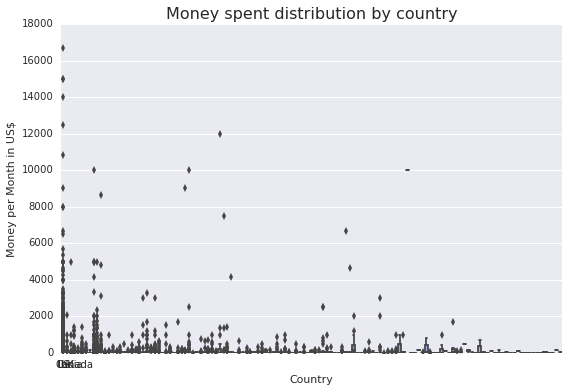

In [82]:
import seaborn as sns
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = usincauk)
plt.title('Money spent distribution by country', fontsize = 16)
plt.ylabel('Money per Month in US$')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We can immediately see there is something off with our US data, because 2 persons have spent more than 50000 dollars per month for learning. That's extremely unlikely, so we are going to remove every value that goes over 20000 dollars per month and then we are going to recreate the plot.

In [74]:
survey_updated = survey_updated[survey_updated['MoneyPerMonth'] < 20000]

In [75]:
countries_mean = survey_updated.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


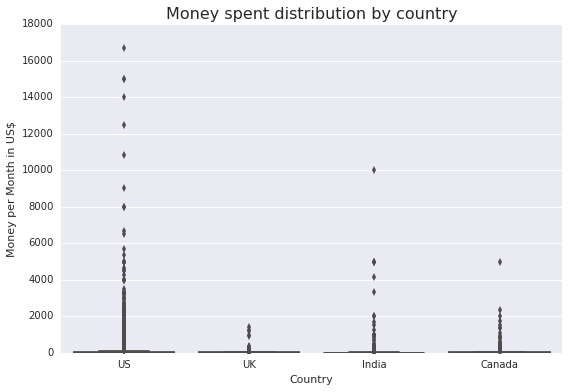

In [83]:
usincauk = survey_updated[survey_updated['CountryLive'].str.contains('United States of America|India|Canada|United Kingdom')]

import seaborn as sns
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = usincauk)
plt.title('Money spent distribution by country', fontsize = 16)
plt.ylabel('Money per Month in US$')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

There are a few outliers for India (oveer $2500 spent per month), so let's take a closer look at those.

In [93]:
india_outliers = usincauk[(usincauk['CountryLive'] == 'India') & (usincauk['MoneyPerMonth'] >=2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth


It doesn't seem like the outliers attended a bootcamp, so we don't have a good explanation for the high money spent. We are going to remove those outliers.

In [94]:
usincauk = usincauk.drop(india_outliers.index)

Let's take a look also at the US outliers (over $6000 spent) 

In [95]:
us_outliers = usincauk[(usincauk['CountryLive'] == 'United States of America') & (usincauk['MoneyPerMonth'] >=6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


6 out of the 11 otliers attended bootcamps, but the other 5 didn't. We are going to remove those 5, but also thise who have been programming for less than 3 months (the amount spent should be realistically lower for under 3 months). 

In [97]:
no_bootcamp = usincauk[
    (usincauk['CountryLive'] == 'United States of America') & 
    (usincauk['MoneyPerMonth'] >= 6000) &
    (usincauk['AttendedBootcamp'] == 0)
]

usincauk = usincauk.drop(no_bootcamp.index)

less_than_3mo = usincauk[
    (usincauk['CountryLive'] == 'United States of America') & 
    (usincauk['MoneyPerMonth'] >= 6000) &
    (usincauk['MonthsProgramming'] <= 3)
]

usincauk = usincauk.drop(less_than_3mo.index)

There's 1 outlier for Canada (that spent over $4500 per month) that we need to examine.

In [100]:
canada_outliers = usincauk[(usincauk['CountryLive'] == 'Canada') & (usincauk['MoneyPerMonth'] >= 4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier attended a bootcamp, but only started 2 months ago. He most likely paid a larger amount of money in the beginning when he enrolled, but didn't paid that sum each month. We are going to remove that outlier as well.

In [101]:
usincauk = usincauk.drop(canada_outliers.index)

Let's recreate our plot with the new cleaned dataset.

In [103]:
usincauk.groupby('CountryLive').mean()['MoneyPerMonth']


CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


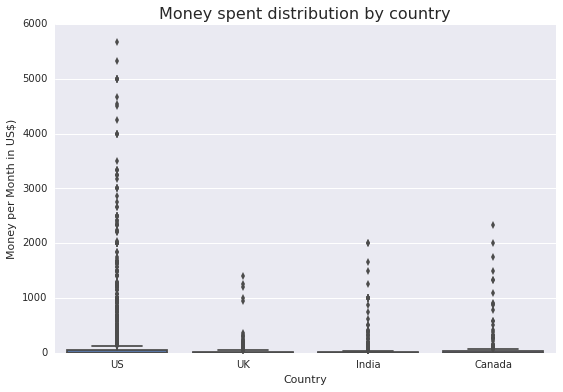

In [105]:
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = usincauk)
plt.title('Money spent distribution by country',
          fontsize = 16)
plt.ylabel('Money per Month in US$)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

# Choosing the Two Best Markets
Considering the results we've found so far, one country we should definitely advertise is US. We have a big number of new coders, that are also willing to pay around $143/month. 
Our monthly subscription is 59 dollars, so the second option might be Canada (93/month) or India (65/month).
UK is definitely out of the question, as the coders there pay around 45/month).

Let's take a look again at the frequency table by country, to decided between Canada and India.


In [107]:
usincauk['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Considering that we have a higher number of potential custumers in India than in Canada, if we can only choose 2 markets, we should obviously go for US and India.
Other options could be to either only advertise in the US or split the budget in 3 and cover both India and Canada (plus of course US).

# Conclusion 

In this project we analyzed the survey data for new coders to find the best 2 markets to advertise in. 
The solid conclusion we've got is that we shoudl advertise in the US. Even if it isn't 100% clear if we should go with Canada or India for the second place, we cand definitely say we have good data to send to the decision makers and a few recommendations to move forward with. 